In [401]:
import numpy as np
import pandas as pd

In [402]:
import html5lib
import requests
import io

## Reading and Understanding the Data

In [403]:
url1 = 'https://drive.google.com/file/d/1acZXKhrnwu28suRpaI5IRQJETaA7ieYZ/view?usp=share_link'
url1 = 'https://drive.google.com/uc?id=' + url1.split('/')[-2]
df = pd.read_csv(url1)
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [404]:
df.shape

(319795, 18)

In [405]:
df.columns.isnull().sum()

0

In [406]:
df.isnull().sum()  # There are no missing values

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [407]:
df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [408]:
catvar = ['HeartDisease','Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory','Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

In [409]:
def valuecounts(x):
    return x.value_counts()

In [410]:
rf = df[catvar].apply(valuecounts)
rf

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
18-24,NaN,NaN,NaN,NaN,NaN,NaN,21064.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25-29,NaN,NaN,NaN,NaN,NaN,NaN,16955.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30-34,NaN,NaN,NaN,NaN,NaN,NaN,18753.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35-39,NaN,NaN,NaN,NaN,NaN,NaN,20550.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40-44,NaN,NaN,NaN,NaN,NaN,NaN,21006.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45-49,NaN,NaN,NaN,NaN,NaN,NaN,21791.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50-54,NaN,NaN,NaN,NaN,NaN,NaN,25382.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55-59,NaN,NaN,NaN,NaN,NaN,NaN,29757.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60-64,NaN,NaN,NaN,NaN,NaN,NaN,33686.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65-69,NaN,NaN,NaN,NaN,NaN,NaN,34151.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [411]:
# Variables with binary outcome

bivars = ['HeartDisease','Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity', 'Asthma', 'KidneyDisease','SkinCancer']

In [412]:
def catcols(x):
    vcnt = x.value_counts()
    n = len(pd.unique(vcnt))
    if n >2:
        return n

In [413]:
cols = df[catvar].apply(catcols)
cols      # cols contails all the categorical variables with more than two levels

HeartDisease         NaN
Smoking              NaN
AlcoholDrinking      NaN
Stroke               NaN
DiffWalking          NaN
Sex                  NaN
AgeCategory         13.0
Race                 6.0
Diabetic             4.0
PhysicalActivity     NaN
GenHealth            5.0
Asthma               NaN
KidneyDisease        NaN
SkinCancer           NaN
dtype: float64

In [414]:
df.AgeCategory.value_counts()  # this is a continuous variable with condenced levels

65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64

In [415]:
df.Race.value_counts() # this is not a continuous variable

White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64

In [416]:
df.Diabetic.value_counts() # this is not a continuous variable as well

No                         269653
Yes                         40802
No, borderline diabetes      6781
Yes (during pregnancy)       2559
Name: Diabetic, dtype: int64

In [417]:
df.GenHealth.value_counts() # neither is this continuous 

Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: GenHealth, dtype: int64

In [418]:
# we should create dummies for these variables: Race, Diabetic, and GenHealth
dumvars = ['Race', 'Diabetic', 'GenHealth']


## Processing the non numeric variables and Getting Dummies

In [419]:
def gettingdummies(df0,row):
    for item in row:
        dummy = pd.get_dummies(df0[item], drop_first = True).rename(columns = lambda x: item+'_'+str(x))
        df0 = pd.concat([df0, dummy], axis = 1)
        df0.drop([item], axis = 1, inplace = True)
    return df0

In [420]:
df1 = gettingdummies(df,dumvars)
df1

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Race_Hispanic,Race_Other,Race_White,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,...,0,0,1,0,1,0,0,0,0,1
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,...,0,0,1,0,0,0,0,0,0,1
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,...,0,0,1,0,1,0,1,0,0,0
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,...,0,0,1,0,0,0,0,1,0,0
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,...,1,0,0,0,1,0,1,0,0,0
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,...,1,0,0,0,0,0,0,0,0,1
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,...,1,0,0,0,0,0,0,1,0,0
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,...,1,0,0,0,0,0,0,1,0,0


In [421]:
df1.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'PhysicalActivity', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'Race_Asian', 'Race_Black', 'Race_Hispanic', 'Race_Other',
       'Race_White', 'Diabetic_No, borderline diabetes', 'Diabetic_Yes',
       'Diabetic_Yes (during pregnancy)', 'GenHealth_Fair', 'GenHealth_Good',
       'GenHealth_Poor', 'GenHealth_Very good'],
      dtype='object')

In [422]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [423]:
import matplotlib.pyplot as plt
import seaborn as sns

In [424]:
def mapping(x):
    return x.map({'Yes': 1, "No": 0})

In [425]:
df1[bivars] = df1[bivars].apply(mapping)

In [426]:
df1.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Race_Hispanic,Race_Other,Race_White,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,16.60,1,0,0,3.0,30.0,0,Female,55-59,...,0,0,1,0,1,0,0,0,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,80 or older,...,0,0,1,0,0,0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,Male,65-69,...,0,0,1,0,1,0,1,0,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,75-79,...,0,0,1,0,0,0,0,1,0,0
4,0,23.71,0,0,0,28.0,0.0,1,Female,40-44,...,0,0,1,0,0,0,0,0,0,1


In [427]:
# we saw that AgeCategory is an aggregated variable, to map AgeCategory



In [428]:
df1.AgeCategory.value_counts()

65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64

In [429]:
def older80(x):
    if x == '18-24':
        return 0
    elif x == '25-29':
        return 1
    elif x == '30-34':
        return 2 
    elif x == '35-39':
        return 3
    elif x == '40-44':
        return 4
    elif x == '45-49':
        return 5
    elif x == '50-54':
        return 6
    elif x == '55-59':
        return 7
    elif x == '60-64':
        return 8
    elif x == '65-69':
        return 9
    elif x == '70-74':
        return 10
    elif x == '75-79':
        return 11
    else:
        return 12

In [430]:
df1['AgeCategory'] = df1['AgeCategory'].apply(older80)

In [431]:
df1['AgeCategory'].value_counts()

9     34151
8     33686
10    31065
7     29757
6     25382
12    24153
5     21791
11    21482
0     21064
4     21006
3     20550
2     18753
1     16955
Name: AgeCategory, dtype: int64

In [432]:
df1.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Race_Hispanic,Race_Other,Race_White,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,16.60,1,0,0,3.0,30.0,0,Female,7,...,0,0,1,0,1,0,0,0,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,12,...,0,0,1,0,0,0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,Male,9,...,0,0,1,0,1,0,1,0,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,11,...,0,0,1,0,0,0,0,1,0,0
4,0,23.71,0,0,0,28.0,0.0,1,Female,4,...,0,0,1,0,0,0,0,0,0,1


In [433]:
df1.Sex.value_counts()

Female    167805
Male      151990
Name: Sex, dtype: int64

In [434]:
def Sexfinder(x):
    if x == 'Female':
        return 0
    if x == 'Male':
        return 1

In [435]:
df1['Sex'] = df1['Sex'].apply(Sexfinder)

In [436]:
df1.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'PhysicalActivity', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'Race_Asian', 'Race_Black', 'Race_Hispanic', 'Race_Other',
       'Race_White', 'Diabetic_No, borderline diabetes', 'Diabetic_Yes',
       'Diabetic_Yes (during pregnancy)', 'GenHealth_Fair', 'GenHealth_Good',
       'GenHealth_Poor', 'GenHealth_Very good'],
      dtype='object')

In [437]:
numvars = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

In [438]:
print(df1[numvars].head(5))
print('shape of df1 is now {}'.format(df1.shape))

     BMI  PhysicalHealth  MentalHealth  SleepTime
0  16.60             3.0          30.0        5.0
1  20.34             0.0           0.0        7.0
2  26.58            20.0          30.0        8.0
3  24.21             0.0           0.0        6.0
4  23.71            28.0           0.0        8.0
shape of df1 is now (319795, 27)


In [439]:
df1.dtypes  # object types have been converted into values

HeartDisease                          int64
BMI                                 float64
Smoking                               int64
AlcoholDrinking                       int64
Stroke                                int64
PhysicalHealth                      float64
MentalHealth                        float64
DiffWalking                           int64
Sex                                   int64
AgeCategory                           int64
PhysicalActivity                      int64
SleepTime                           float64
Asthma                                int64
KidneyDisease                         int64
SkinCancer                            int64
Race_Asian                            uint8
Race_Black                            uint8
Race_Hispanic                         uint8
Race_Other                            uint8
Race_White                            uint8
Diabetic_No, borderline diabetes      uint8
Diabetic_Yes                          uint8
Diabetic_Yes (during pregnancy) 

## Outlier Analysis

In [440]:
df1[numvars].describe(percentiles = [0.25, 0.5, 0.75, 0.85, 0.9, 0.95, 1])

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
85%,34.330000,5.00000,10.000000,8.000000
90%,36.490000,14.00000,15.000000,8.000000
95%,40.180000,30.00000,30.000000,9.000000


In [441]:
import matplotlib.pyplot as plt
import seaborn as sns

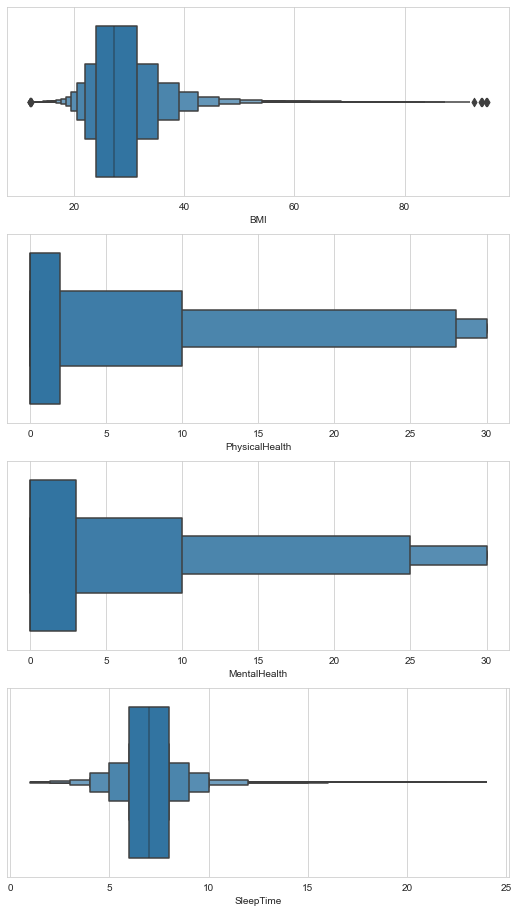

In [442]:
fig, axes = plt.subplots(4,1, figsize=(9,16))
sns.boxenplot(x=df1.BMI, ax = axes[0])
sns.boxenplot(x=df1.PhysicalHealth, ax = axes[1])
sns.boxenplot(x=df1.MentalHealth, ax = axes[2])
sns.boxenplot(x=df1.SleepTime, ax = axes[3])
plt.show()

In [443]:
df_y = df1[df1.HeartDisease == 1]
df_n = df1[df1.HeartDisease == 0]

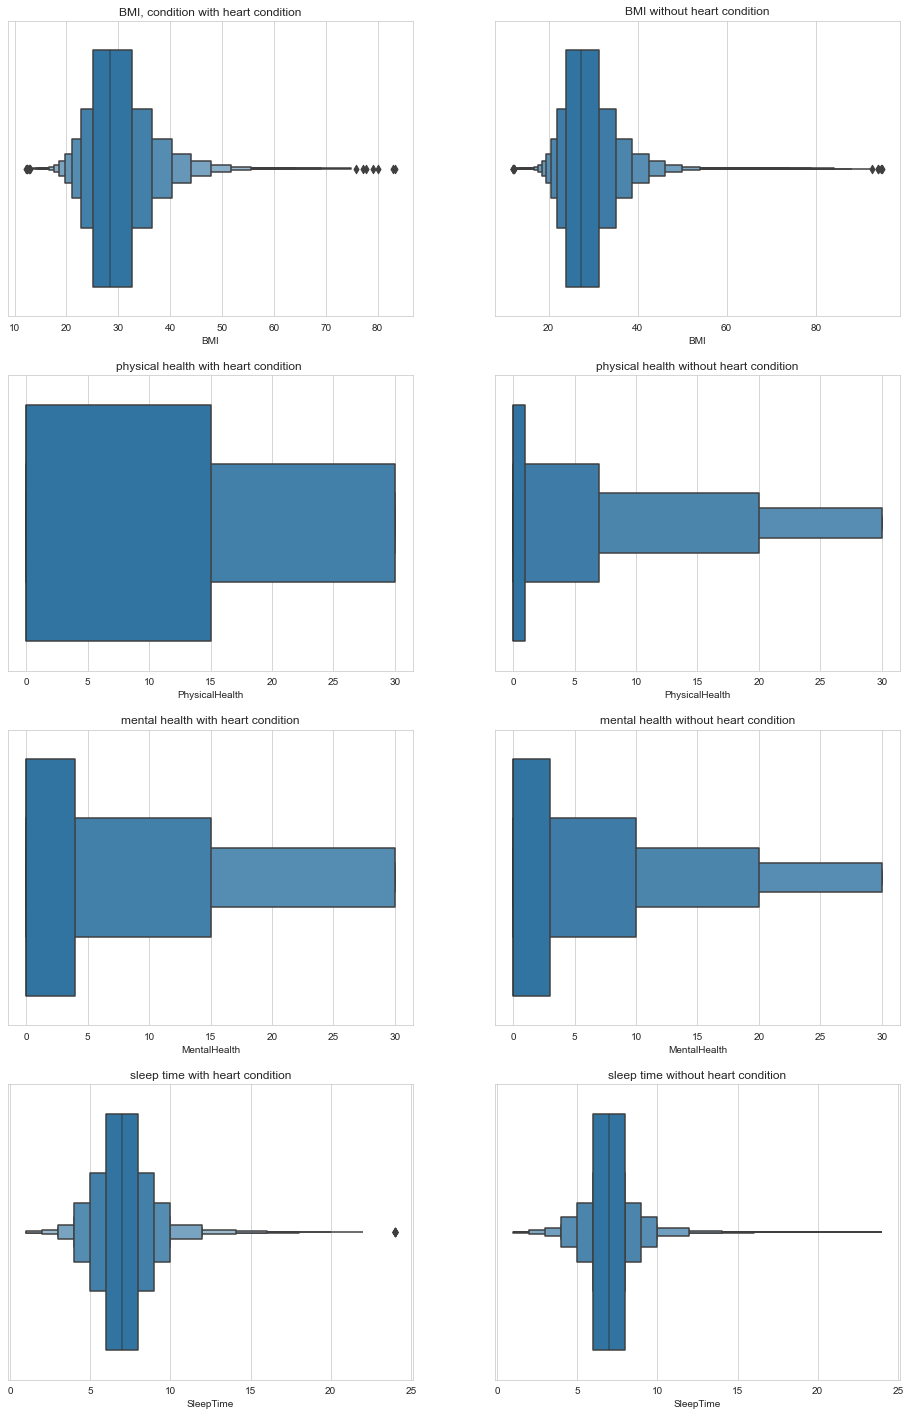

In [444]:
fig, axes = plt.subplots(4,2, figsize=(16,25))
sns.boxenplot(x=df_y.BMI, ax = axes[0,0]).set(title = 'BMI, condition with heart condition')
sns.boxenplot(x=df_y.PhysicalHealth, ax = axes[1,0]).set(title = 'physical health with heart condition ')
sns.boxenplot(x=df_y.MentalHealth, ax = axes[2,0]).set(title = 'mental health with heart condition')
sns.boxenplot(x=df_y.SleepTime, ax = axes[3,0]).set(title = 'sleep time with heart condition')
sns.boxenplot(x=df_n.BMI, ax = axes[0,1]).set(title = 'BMI without heart condition')
sns.boxenplot(x=df_n.PhysicalHealth, ax = axes[1,1]).set(title = 'physical health without heart condition')
sns.boxenplot(x=df_n.MentalHealth, ax = axes[2,1]).set(title = 'mental health without heart condition')
sns.boxenplot(x=df_n.SleepTime, ax = axes[3,1]).set(title = 'sleep time without heart condition')
plt.show()

#### We see having a heart disease or not does not affect the distribution curve in a significant way, and all the variables are skewed towards the positive side. Hence all the outliers are on the positive side.

In [445]:
highbmi = df1[df1['BMI']>=55]
highbmi.shape

(980, 27)

In [446]:
#how many have heart disease
highbmi[highbmi.HeartDisease==1]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Race_Hispanic,Race_Other,Race_White,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
686,1,55.85,0,0,0,30.0,0.0,0,1,8,...,0,0,1,0,1,0,1,0,0,0
4370,1,63.62,0,1,0,0.0,0.0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
6347,1,56.49,0,0,1,0.0,0.0,0,1,12,...,0,0,1,0,0,0,1,0,0,0
9358,1,75.77,1,1,1,0.0,30.0,1,1,2,...,0,0,0,0,1,0,1,0,0,0
9499,1,83.00,1,1,1,30.0,30.0,1,1,6,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309380,1,55.79,1,1,0,20.0,25.0,1,1,9,...,0,0,1,0,1,0,0,0,1,0
310818,1,56.12,0,0,0,29.0,0.0,1,1,8,...,0,0,1,0,0,0,1,0,0,0
311370,1,61.60,0,0,0,30.0,30.0,1,0,8,...,1,0,0,1,0,0,0,0,1,0
314099,1,58.53,0,0,0,0.0,0.0,1,0,5,...,0,1,0,0,1,0,0,1,0,0


In [447]:
erraticST = df1[df1.SleepTime>12]
erraticST.shape # I think it is safe to say that those who sleep more than 12 hours are not sound candidates

(999, 27)

In [448]:
# how many of them have heart disease though?
erraticST[erraticST.HeartDisease==1].shape


(168, 27)

In [449]:
# how many of them have BMI>55

print(erraticST[erraticST.BMI<15.5].shape)
print(erraticST[erraticST.BMI>55].shape)

# I think we should definately remove these records

(7, 27)
(11, 27)


#### We filter out people who sleep more than 12 hours and lie outside the critical BMI range for healthy people

In [450]:
highMH = df1[df1.MentalHealth>20]

In [451]:
highPH = df1[df1.PhysicalHealth>20]

In [452]:
highPH[highPH.MentalHealth>20] # I don't think the outlier distribution is that skewed

# although most of the scores are clumped at the bottom of the scale

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Race_Hispanic,Race_Other,Race_White,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
25,0,29.18,1,0,0,30.0,30.0,1,0,8,...,0,0,1,0,0,0,0,0,1,0
78,1,28.29,1,0,0,30.0,30.0,0,0,10,...,0,0,1,0,1,0,0,0,1,0
101,1,24.68,1,0,0,30.0,30.0,1,1,10,...,0,0,1,0,0,0,1,0,0,0
162,1,26.29,0,0,0,30.0,30.0,1,0,12,...,0,0,1,0,0,0,0,0,1,0
188,0,29.53,1,0,0,30.0,30.0,1,0,9,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319408,0,38.86,0,0,0,30.0,30.0,1,0,5,...,1,0,0,0,0,0,1,0,0,0
319483,0,38.77,0,0,0,28.0,25.0,1,0,7,...,1,0,0,1,0,0,1,0,0,0
319721,1,39.30,0,0,0,30.0,30.0,1,0,8,...,1,0,0,0,1,0,1,0,0,0
319760,0,24.79,0,0,0,30.0,30.0,1,0,8,...,1,0,0,0,0,0,1,0,0,0


In [453]:
df2 = df1[(df1.BMI>15.5) & (df1.BMI<55)]
df3 = df2[df2.SleepTime<12]

In [454]:
df3.shape

(315210, 27)

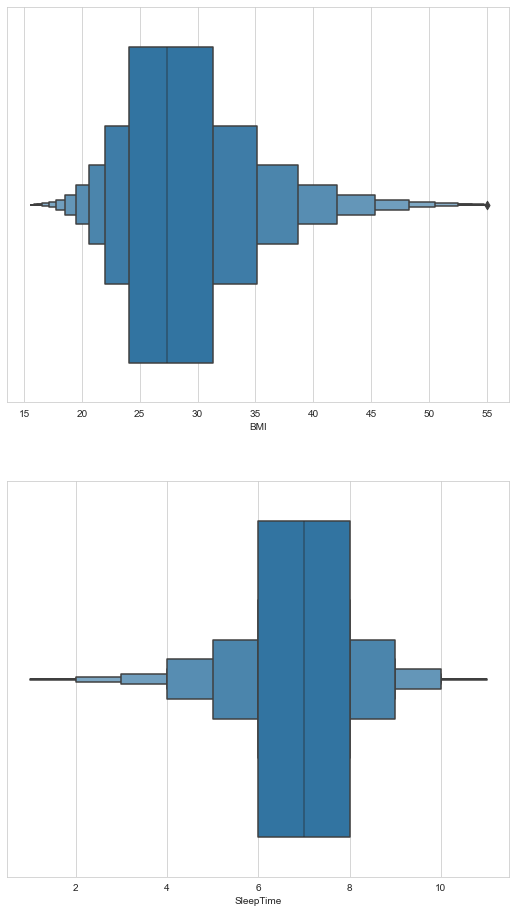

In [455]:
#lets see the distribution now

fig, axes = plt.subplots(2,1, figsize=(9,16))
sns.boxenplot(x=df3.BMI, ax = axes[0])
sns.boxenplot(x=df3.SleepTime, ax = axes[1])
plt.show()

# I think we should also filter those out who are sleeping less than 4 hours

In [456]:
df4 = df3[df3.SleepTime>4]

In [457]:
df4.shape # now we have filtered out people with extreme BMI and sleep time

(304250, 27)

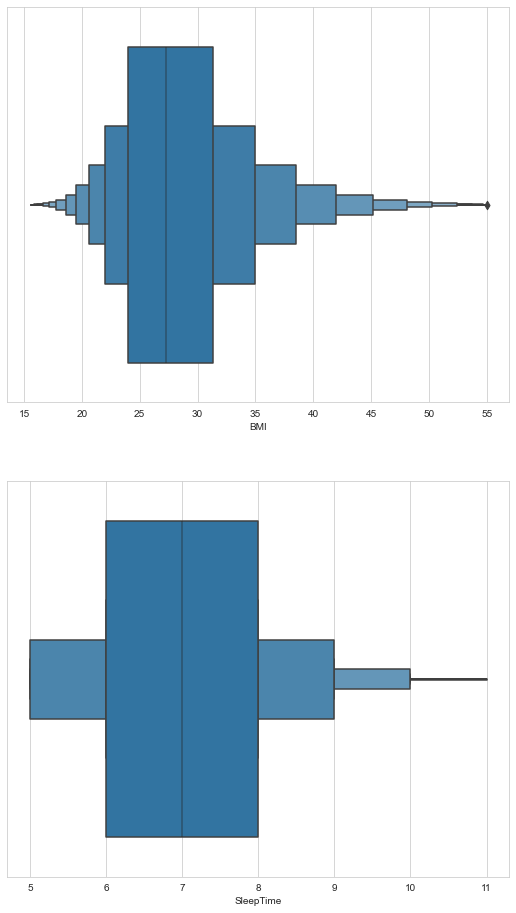

In [458]:
# les check the distributions again

fig, axes = plt.subplots(2,1, figsize=(9,16))
sns.boxenplot(x=df4.BMI, ax = axes[0])
sns.boxenplot(x=df4.SleepTime, ax = axes[1])
plt.show()

In [459]:
df4.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'PhysicalActivity', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'Race_Asian', 'Race_Black', 'Race_Hispanic', 'Race_Other',
       'Race_White', 'Diabetic_No, borderline diabetes', 'Diabetic_Yes',
       'Diabetic_Yes (during pregnancy)', 'GenHealth_Fair', 'GenHealth_Good',
       'GenHealth_Poor', 'GenHealth_Very good'],
      dtype='object')

In [460]:
churn = round(len(df4[df4['HeartDisease']==1])/len(df4.HeartDisease)*100,2)

print('total % of people with heart disease is {}'.format(churn))

total % of people with heart disease is 8.2


In [461]:
# before rejecting the row it was 

churn1 = round(len(df[df['HeartDisease']=='Yes'])/len(df.HeartDisease)*100,2)

print('total % of people with heart disease before rejecting the rows {}'.format(churn1))

# we can deduce from that there were more % of churn cases in those rows than the remaining datasets

total % of people with heart disease before rejecting the rows 8.56


## Understanding the Collinearities inside the Data

In [462]:
df_cat = df4[['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory',
       'PhysicalActivity', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'Race_Asian', 'Race_Black', 'Race_Hispanic', 'Race_Other',
       'Race_White', 'Diabetic_No, borderline diabetes', 'Diabetic_Yes',
       'Diabetic_Yes (during pregnancy)', 'GenHealth_Fair', 'GenHealth_Good',
       'GenHealth_Poor', 'GenHealth_Very good']]

In [463]:
X = df_cat
y = df_cat.pop('HeartDisease')

for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

In [464]:
from sklearn.feature_selection import mutual_info_regression
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [465]:
mi_scores = make_mi_scores(X, y, discrete_features)

In [466]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

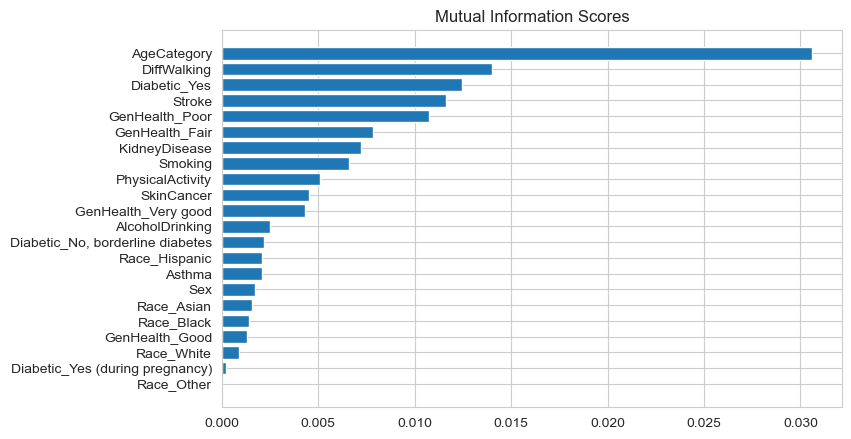

In [467]:
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores) # only AgeCatefory has some correlation with the target


# we will keep this in mind, but will not drop it just yet

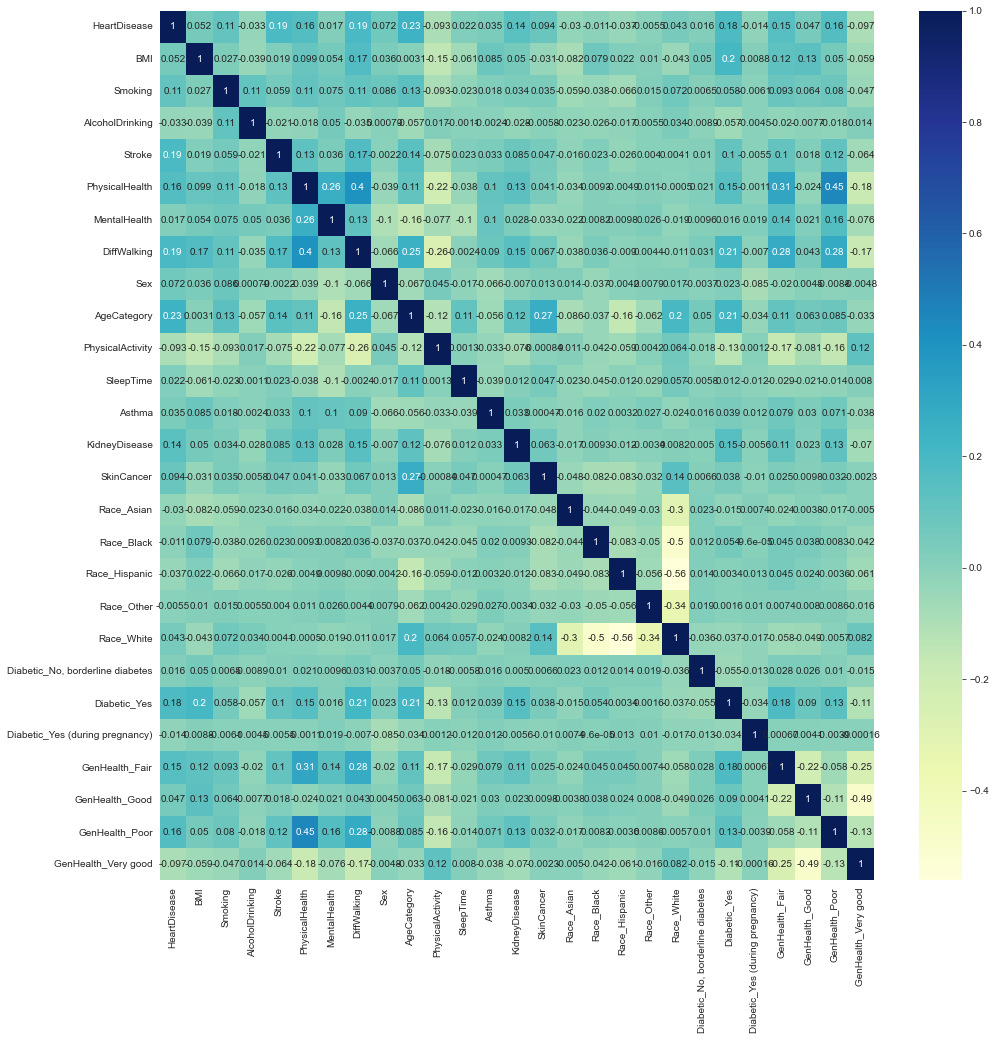

In [468]:
plt.figure(figsize=(16,16))
sns.heatmap(df4.corr(), annot = True, cmap = 'YlGnBu')
plt.show()   # we don't see any extremely high correlations

In [469]:
from sklearn.model_selection import train_test_split

In [470]:
X = df4
y = df4.pop('HeartDisease')

In [471]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

In [472]:
from sklearn.preprocessing import StandardScaler

In [473]:
scaler = StandardScaler()

X_train[['BMI', 'MentalHealth', 'PhysicalHealth', 'SleepTime', 'AgeCategory']] = scaler.fit_transform(X_train[['BMI', 'MentalHealth', 'PhysicalHealth', 'SleepTime', 'AgeCategory']])

In [474]:
X.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,PhysicalActivity,...,Race_Hispanic,Race_Other,Race_White,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,16.60,1,0,0,3.0,30.0,0,0,7,1,...,0,0,1,0,1,0,0,0,0,1
1,20.34,0,0,1,0.0,0.0,0,0,12,1,...,0,0,1,0,0,0,0,0,0,1
2,26.58,1,0,0,20.0,30.0,0,1,9,1,...,0,0,1,0,1,0,1,0,0,0
3,24.21,0,0,0,0.0,0.0,0,0,11,0,...,0,0,1,0,0,0,0,1,0,0
4,23.71,0,0,0,28.0,0.0,1,0,4,1,...,0,0,1,0,0,0,0,0,0,1


In [475]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [476]:
from sklearn.feature_selection import RFE
logreg.fit(X_train, y_train)

rfe = RFE(estimator = LogisticRegression(), n_features_to_select = 17)             
rfe = rfe.fit(X_train, y_train)

In [477]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))  

[('BMI', False, 6),
 ('Smoking', True, 1),
 ('AlcoholDrinking', True, 1),
 ('Stroke', True, 1),
 ('PhysicalHealth', False, 9),
 ('MentalHealth', False, 7),
 ('DiffWalking', True, 1),
 ('Sex', True, 1),
 ('AgeCategory', True, 1),
 ('PhysicalActivity', False, 10),
 ('SleepTime', False, 8),
 ('Asthma', True, 1),
 ('KidneyDisease', True, 1),
 ('SkinCancer', False, 3),
 ('Race_Asian', True, 1),
 ('Race_Black', True, 1),
 ('Race_Hispanic', True, 1),
 ('Race_Other', False, 4),
 ('Race_White', False, 5),
 ('Diabetic_No, borderline diabetes', False, 2),
 ('Diabetic_Yes', True, 1),
 ('Diabetic_Yes (during pregnancy)', True, 1),
 ('GenHealth_Fair', True, 1),
 ('GenHealth_Good', True, 1),
 ('GenHealth_Poor', True, 1),
 ('GenHealth_Very good', True, 1)]

In [478]:
col = X_train.columns[rfe.support_]

In [479]:
X_train.columns[~rfe.support_]

Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'PhysicalActivity',
       'SleepTime', 'SkinCancer', 'Race_Other', 'Race_White',
       'Diabetic_No, borderline diabetes'],
      dtype='object')

In [480]:
X_train_rfe = X_train[col]

In [481]:
X_train_sm = sm.add_constant(X_train_rfe)
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()   #Diabetic_Yes (during pregnancy) seems insignificant

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           HeartDisease   No. Observations:               243400
Model:                            GLM   Df Residuals:                   243382
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -53601.
Date:                Wed, 09 Nov 2022   Deviance:                   1.0720e+05
Time:                        18:02:24   Pearson chi2:                 2.28e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.1177
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -4.5745      0.035   -132.510      0.000      -4.642      -4.507
Smoking                             0.3427      0.017     20.573      0.000       0.310       0.375
AlcoholDrinking                    -0.2813      0.040     -7.051      0.000      -0.360      -0.203
Stroke                              0.9995      0.027     36.991      0.000       0.947       1.052
DiffWalking                         0.2225      0.020     10.927      0.000       0.183       0.262
Sex                                 0.7335      0.017     43.438      0.000       0.700       0.767
AgeCategory                         0.9770      0.012     82.078      0.000       0.954       1.000
Asthma                              0.2795      0.023     12.273      0.000       0.235       0.324
KidneyDisease                       0.5607      0.029     19.364      0.000       0.504       0.617
Race_Asian                         -0.4839      0.079     -6.134      0.000      -0.638      -0.329
Race_Black                         -0.2564      0.034     -7.494      0.000      -0.323      -0.189
Race_Hispanic                      -0.1864      0.036     -5.132      0.000      -0.258      -0.115
Diabetic_Yes                        0.4930      0.019     25.965      0.000       0.456       0.530
Diabetic_Yes (during pregnancy)     0.1856      0.122      1.527      0.127      -0.053       0.424
GenHealth_Fair                      1.6506      0.037     44.470      0.000       1.578       1.723
GenHealth_Good                      1.1270      0.034     33.018      0.000       1.060       1.194
GenHealth_Poor                      2.0750      0.044     46.727      0.000       1.988       2.162
GenHealth_Very good                 0.5269      0.035     14.993      0.000       0.458       0.596
===================================================================================================
"""

In [482]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [483]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif  # we do not have any variables with high VIF

,Features,VIF
0,Smoking,1.73
4,Sex,1.69
14,GenHealth_Good,1.65
16,GenHealth_Very good,1.51
3,DiffWalking,1.50
13,GenHealth_Fair,1.49
11,Diabetic_Yes,1.30
15,GenHealth_Poor,1.26
5,AgeCategory,1.19
6,Asthma,1.17


In [484]:
# we drop this variable because it has a high p-value



X_train_1 = X_train_rfe.drop('Diabetic_Yes (during pregnancy)', axis = 1)
X_train_sm1 = sm.add_constant(X_train_1)

In [485]:
col = X_train_1.columns

In [486]:
logm1 = sm.GLM(y_train,X_train_sm1, family = sm.families.Binomial())
res1 = logm1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           HeartDisease   No. Observations:               243400
Model:                            GLM   Df Residuals:                   243383
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -53602.
Date:                Wed, 09 Nov 2022   Deviance:                   1.0720e+05
Time:                        18:02:28   Pearson chi2:                 2.28e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.1177
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -4.5722      0.034   -132.593      0.000      -4.640      -4.505
Smoking                 0.3428      0.017     20.579      0.000       0.310       0.375
AlcoholDrinking        -0.2816      0.040     -7.058      0.000      -0.360      -0.203
Stroke                  0.9995      0.027     36.992      0.000       0.947       1.052
DiffWalking             0.2225      0.020     10.926      0.000       0.183       0.262
Sex                     0.7316      0.017     43.462      0.000       0.699       0.765
AgeCategory             0.9764      0.012     82.082      0.000       0.953       1.000
Asthma                  0.2795      0.023     12.273      0.000       0.235       0.324
KidneyDisease           0.5606      0.029     19.363      0.000       0.504       0.617
Race_Asian             -0.4834      0.079     -6.127      0.000      -0.638      -0.329
Race_Black             -0.2563      0.034     -7.491      0.000      -0.323      -0.189
Race_Hispanic          -0.1861      0.036     -5.124      0.000      -0.257      -0.115
Diabetic_Yes            0.4919      0.019     25.930      0.000       0.455       0.529
GenHealth_Fair          1.6509      0.037     44.480      0.000       1.578       1.724
GenHealth_Good          1.1273      0.034     33.026      0.000       1.060       1.194
GenHealth_Poor          2.0752      0.044     46.730      0.000       1.988       2.162
GenHealth_Very good     0.5270      0.035     14.996      0.000       0.458       0.596
=======================================================================================
"""

In [487]:
vif = pd.DataFrame()
vif['Features'] = X_train_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif # res1 seems like a good model

# no high VIFs, and all the variables are significant. 

,Features,VIF
0,Smoking,1.73
4,Sex,1.69
13,GenHealth_Good,1.65
15,GenHealth_Very good,1.51
3,DiffWalking,1.50
12,GenHealth_Fair,1.48
11,Diabetic_Yes,1.30
14,GenHealth_Poor,1.26
5,AgeCategory,1.19
6,Asthma,1.17


In [488]:
y_train_pred = res1.predict(X_train_sm1).values.reshape(-1)

In [489]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})

y_train_pred_final['Churn_Prob'] = y_train_pred

In [490]:
y_train_pred_final

,Churn,Churn_Prob
0,1,0.110734
1,0,0.001409
2,0,0.041166
3,0,0.071464
4,0,0.152526
...,...,...
243395,0,0.009854
243396,1,0.210124
243397,0,0.053608
243398,0,0.015223


#### Finding the Cutoff ( accuracy, sensitivity, specificity)

In [491]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.110734,1,1,0,0,0,0,0,0,0,0
1,0,0.001409,1,0,0,0,0,0,0,0,0,0
2,0,0.041166,1,0,0,0,0,0,0,0,0,0
3,0,0.071464,1,0,0,0,0,0,0,0,0,0
4,0,0.152526,1,1,0,0,0,0,0,0,0,0


In [492]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.081660  1.000000  0.000000
0.1   0.1  0.790719  0.720115  0.796997
0.2   0.2  0.881726  0.451550  0.919977
0.3   0.3  0.908763  0.272188  0.965368
0.4   0.4  0.916763  0.172318  0.982959
0.5   0.5  0.919285  0.099215  0.992207
0.6   0.6  0.919581  0.050111  0.996895
0.7   0.7  0.919166  0.021584  0.998980
0.8   0.8  0.918624  0.005132  0.999852
0.9   0.9  0.918377  0.000453  1.000000


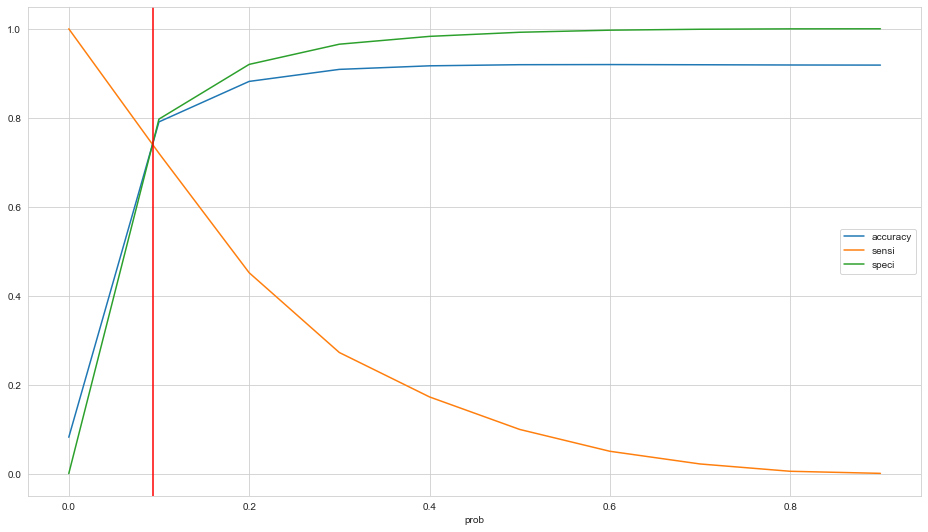

In [493]:

sns.set_style('whitegrid')
%matplotlib inline
cutoff_df.plot.line( x='prob', y=['accuracy','sensi','speci'], figsize = (16,9))
plt.axvline(x = 0.093, color = 'r', linestyle = '-')
plt.show()  # the vertical line took some trial and error

cutoff: 0.093

In [494]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [495]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

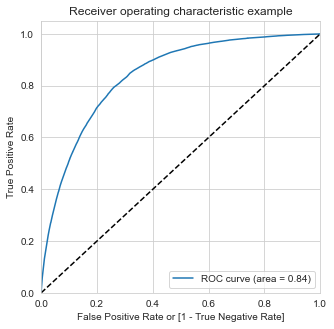

In [496]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

# this is a farely good roc curve

In [497]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.093 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,1,0.110734,1,1,0,0,0,0,0,0,0,0,1
1,0,0.001409,1,0,0,0,0,0,0,0,0,0,0
2,0,0.041166,1,0,0,0,0,0,0,0,0,0,0
3,0,0.071464,1,0,0,0,0,0,0,0,0,0,0
4,0,0.152526,1,1,0,0,0,0,0,0,0,0,1


In [498]:
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.7725184880854561


In [499]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion


# we see this model can detect the majority of positive cases
# but it also identifies a lot of negatives as possitive. 


array([[173148,  50376],
       [  4993,  14883]])

#### Finding the Cutoff (Precision and Recall)

In [500]:
from sklearn.metrics import precision_recall_curve

In [501]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

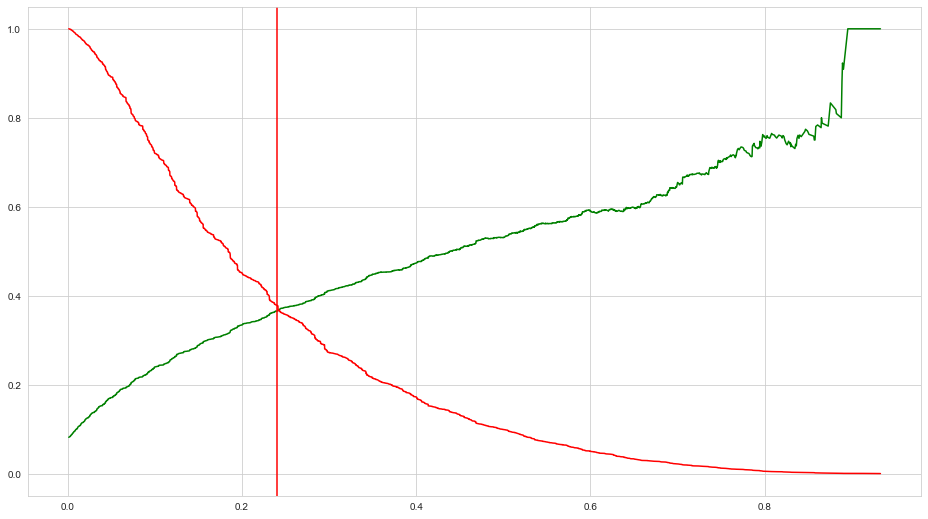

In [502]:
plt.figure(figsize=(16,9))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.axvline(x = 0.24, color = 'r', linestyle = '-')
plt.show()

cutoff: 0.24

In [503]:
y_train_pred_final['predicted2'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.24 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted,predicted2
0,1,0.110734,1,1,0,0,0,0,0,0,0,0,1,0
1,0,0.001409,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0.041166,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0.071464,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0.152526,1,1,0,0,0,0,0,0,0,0,1,0


In [504]:
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted2))

0.8955916187345933


In [505]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted2 )
confusion

# This way we are getting a lot of False Negatives
# Which is not a good thing for this perticular problem
# But let us check both of these cutoffs on the Test Set

array([[210462,  13062],
       [ 12351,   7525]])

# Predictions on Test Set

In [506]:
X_test[['BMI', 'MentalHealth', 'PhysicalHealth', 'SleepTime', 'AgeCategory']] = scaler.transform(X_test[['BMI', 'MentalHealth', 'PhysicalHealth', 'SleepTime', 'AgeCategory']])

In [507]:
X_test = X_test[col]
X_test.head()

,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Asthma,KidneyDisease,Race_Asian,Race_Black,Race_Hispanic,Diabetic_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
213017,0,0,0,0,0,-0.144862,0,0,0,0,1,0,0,0,0,0
26696,1,0,0,0,1,-0.424761,0,0,0,0,0,0,0,0,0,0
54022,0,0,0,0,1,-0.424761,0,0,0,0,0,0,0,0,0,1
86632,0,0,0,0,0,-0.144862,1,0,0,0,0,0,0,1,0,0
82142,1,0,0,0,0,-0.984558,0,0,0,0,0,0,0,0,0,1


In [508]:
X_test_sm = sm.add_constant(X_test)

In [509]:
y_test_pred = res1.predict(X_test_sm)

In [510]:
y_test_pred

213017    0.007394
26696     0.019600
54022     0.023469
86632     0.035338
82142     0.009343
            ...   
201640    0.027152
9468      0.076482
144661    0.004039
27254     0.077910
73955     0.010540
Length: 60850, dtype: float64

In [511]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
213017,0.007394
26696,0.019600
54022,0.023469
86632,0.035338
82142,0.009343


In [512]:
y_test_df = pd.DataFrame(y_test)
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [513]:
y_pred_final.columns = ['churn', 'churnProb']

In [514]:
y_pred_final

,churn,churnProb
213017,0,0.007394
26696,0,0.019600
54022,0,0.023469
86632,0,0.035338
82142,0,0.009343
...,...,...
201640,0,0.027152
9468,0,0.076482
144661,0,0.004039
27254,1,0.077910


In [515]:
y_pred_final['final_predicted1'] = y_pred_final.churnProb.map(lambda x: 1 if x > 0.093 else 0)

In [516]:
y_pred_final['final_predicted2'] = y_pred_final.churnProb.map(lambda x: 1 if x > 0.24 else 0)

In [517]:
y_pred_final

,churn,churnProb,final_predicted1,final_predicted2
213017,0,0.007394,0,0
26696,0,0.019600,0,0
54022,0,0.023469,0,0
86632,0,0.035338,0,0
82142,0,0.009343,0,0
...,...,...,...,...
201640,0,0.027152,0,0
9468,0,0.076482,0,0
144661,0,0.004039,0,0
27254,1,0.077910,0,0


In [518]:
x1 = metrics.accuracy_score(y_pred_final.churn, y_pred_final.final_predicted1) 

print('accuracy score of model1 {}'.format(x1))

accuracy score of model1 0.7719638455217749


In [519]:
x2 = metrics.accuracy_score(y_pred_final.churn, y_pred_final.final_predicted2) 

print('accuracy score of model2 {}'.format(x2))

accuracy score of model2 0.8966310599835662


In [520]:
confusionx = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.final_predicted1 )
confusionx

print('model 1 confusion\n{}'.format(confusionx))

model 1 confusion
[[43219 12561]
 [ 1315  3755]]


In [521]:
confusiony = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.final_predicted2 )
confusiony

print('model2 confusion\n{}'.format(confusiony))

model2 confusion
[[52670  3110]
 [ 3180  1890]]


#### Scores

In [522]:
# cutoff : 0.093

TP1 = confusionx[1,1] # true positive 
TN1 = confusionx[0,0] # true negatives
FP1 = confusionx[0,1] # false positives
FN1 = confusionx[1,0] # false negatives

senx = TP1 / float(TP1+FN1)
spefx = TN1 / float(TN1+FP1)
FPRx = 1 - spefx
precisionx = TP1/float(TP1+FP1)

In [523]:
# cutoff : 0.24

TP2 = confusiony[1,1] # true positive 
TN2 = confusiony[0,0] # true negatives
FP2 = confusiony[0,1] # false positives
FN2 = confusiony[1,0] # false negatives

seny = TP2 / float(TP2+FN2)
spefy = TN2 / float(TN2+FP2)
FPRy = 1 - spefy
precisiony = TP2/float(TP2+FP2)

In [524]:
print('Recall, True Positive Rate, and Sensitivity of model1\n    {}'.format(senx))
print('specificity of the model\n    {}'.format(spefx))
print('False Positive Rate\n    {}'.format(FPRx))
print('Precision of the model\n    {}    '.format(precisionx))
print('accuracy score of model1\n    {}'.format(x1))

Recall, True Positive Rate, and Sensitivity of model1
    0.7406311637080868
specificity of the model
    0.77481176048763
False Positive Rate
    0.22518823951237
Precision of the model
    0.2301421917136553    
accuracy score of model1
    0.7719638455217749


In [525]:
print('Recall, True Positive Rate, and Sensitivity of model2\n    {}'.format(seny))
print('specificity of the model\n    {}'.format(spefy))
print('False Positive Rate\n    {}'.format(FPRy))
print('Precision of the model\n    {}    '.format(precisiony))
print('accuracy score of model2\n    {}'.format(x2))

Recall, True Positive Rate, and Sensitivity of model2
    0.3727810650887574
specificity of the model
    0.9442452491932593
False Positive Rate
    0.05575475080674075
Precision of the model
    0.378    
accuracy score of model2
    0.8966310599835662


#### I believe the first model is better given the ethical side of the task, because in hospitals it is better to diagnose someone and not have that person a heart disease, than to not diagnose someone who has a heart disease. But model2 which is essentially the same model with a higher cutoff can have better value in a different setting, like fitness testing.

In [526]:
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           HeartDisease   No. Observations:               243400
Model:                            GLM   Df Residuals:                   243383
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -53602.
Date:                Wed, 09 Nov 2022   Deviance:                   1.0720e+05
Time:                        18:02:33   Pearson chi2:                 2.28e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.1177
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -4.5722      0.034   -132.593      0.000      -4.640      -4.505
Smoking                 0.3428      0.017     20.579      0.000       0.310       0.375
AlcoholDrinking        -0.2816      0.040     -7.058      0.000      -0.360      -0.203
Stroke                  0.9995      0.027     36.992      0.000       0.947       1.052
DiffWalking             0.2225      0.020     10.926      0.000       0.183       0.262
Sex                     0.7316      0.017     43.462      0.000       0.699       0.765
AgeCategory             0.9764      0.012     82.082      0.000       0.953       1.000
Asthma                  0.2795      0.023     12.273      0.000       0.235       0.324
KidneyDisease           0.5606      0.029     19.363      0.000       0.504       0.617
Race_Asian             -0.4834      0.079     -6.127      0.000      -0.638      -0.329
Race_Black             -0.2563      0.034     -7.491      0.000      -0.323      -0.189
Race_Hispanic          -0.1861      0.036     -5.124      0.000      -0.257      -0.115
Diabetic_Yes            0.4919      0.019     25.930      0.000       0.455       0.529
GenHealth_Fair          1.6509      0.037     44.480      0.000       1.578       1.724
GenHealth_Good          1.1273      0.034     33.026      0.000       1.060       1.194
GenHealth_Poor          2.0752      0.044     46.730      0.000       1.988       2.162
GenHealth_Very good     0.5270      0.035     14.996      0.000       0.458       0.596
=======================================================================================
"""